In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [16]:
cancer=load_breast_cancer()
cancer
print(cancer.keys())

#X와 y에 데이터 배분
X = cancer['data']
y = cancer['target']

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [58]:
y[y==0].shape[0],y[y==1].shape[0] #y값에 0,1 할당
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [68]:
#train, test 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,test_size=0.2)

In [69]:
#training & testing data의 accuracy?(train set으로 훈련후(모델:로지스틱모델), test set로 검정.)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
print("Logistic Training Accuracy: {:.2f}".format(logistic_model.score(X_train, y_train)))
print("Logistic Testing Accuracy: {:.2f}".format(logistic_model.score(X_test, y_test))) #높은 정확도

Logistic Training Accuracy: 0.96
Logistic Testing Accuracy: 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
#유방암 데이터의 변수값을 보여주는 df
df_data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_target = pd.DataFrame(cancer.target, columns=['class'])
df = pd.concat([df_data,df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [50]:
#로지스틱 모델 만들기
import numpy as np
import matplotlib.pyplot as plt

X_radius = X[:, 1].reshape(-1,1) #X=radius변수 
y = (y==0).astype(np.int) #y=target

logistic_model.fit(X_radius,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

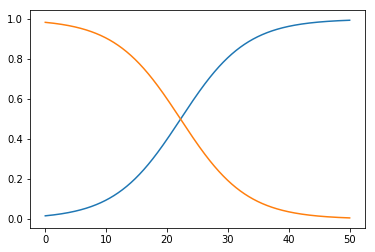

In [60]:
#이 모델의 시각화
X_new = np.linspace(0, 50, 1000).reshape(-1,1)
y_prob = logistic_model.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1])
plt.plot(X_new, y_prob[:,0])

In [52]:
#예측
logistic_model.predict([[20], [0.1]]) #radius 변수값에 20, 0.1이 할당되면 예측값은 둘 다 0이 나온다.

array([0, 0])